# 220968280 - Anirudh Swaminathan - DSE A2

## Week 7 - Exercise 1 - Naive Bayes Classifier on adult.csv

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import category_encoders as ce
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
%matplotlib inline

### 2. Import dataset(adult.csv)

In [2]:
df = pd.read_csv('adult.csv', header=None, sep=',\s',engine='python')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 3. Exploratory data analysis 

In [3]:
df.shape

(32561, 15)

In [4]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

In [5]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship','race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df.columns = col_names
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
categorical = [var for var in df.columns if df[var].dtype=='O']
df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [8]:
df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [9]:
for var in categorical: 
    print(df[var].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      

In [10]:
for var in categorical: 
    print(df[var].value_counts()/float(len(df)))

workclass
Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: count, dtype: float64
education
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: count, dtype: float64
marital_status
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: coun

In [11]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [12]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [13]:
df['workclass'].replace('?', np.NaN, inplace=True)

C:\Users\s_ani\AppData\Local\Temp\ipykernel_30668\4190112677.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].replace('?', np.NaN, inplace=True)


In [14]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [15]:
df['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [16]:
df['occupation'].replace('?', np.NaN, inplace=True)

C:\Users\s_ani\AppData\Local\Temp\ipykernel_30668\3926432027.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['occupation'].replace('?', np.NaN, inplace=True)


In [17]:
df['native_country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [18]:
df['native_country'].value_counts()

native_country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [19]:
df['native_country'].replace('?', np.NaN, inplace=True)

C:\Users\s_ani\AppData\Local\Temp\ipykernel_30668\3320721696.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['native_country'].replace('?', np.NaN, inplace=True)


In [20]:
df[categorical].isnull().sum()


workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

In [21]:
numerical = [var for var in df.columns if df[var].dtype!='O']
print(f'There are {len(numerical)} numerical variables\n')

There are 6 numerical variables



In [22]:
df[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [23]:
df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

### 4. Declare feature vector and target variable 

In [24]:
X = df.drop(['income'], axis=1)
y = df['income']

### 5. Split data into separate training and test set

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### 6. print the percentage of missing values in the categorical variables in the training set


In [26]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
X_train[categorical].isnull().sum()

workclass         1276
education            0
marital_status       0
occupation        1278
relationship         0
race                 0
sex                  0
native_country     414
dtype: int64

### 7. print categorical variables with missing data

In [27]:
for i in categorical:
    if X_train[i].isnull().sum()>0:
        print(i)

workclass
occupation
native_country


### 8. impute missing categorical variables with the most frequent value

In [28]:
for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)   

C:\Users\s_ani\AppData\Local\Temp\ipykernel_30668\1475779539.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
C:\Users\s_ani\AppData\Local\Temp\ipykernel_30668\1475779539.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

### 9. Encode categorical variables

In [29]:
encoder = ce.OneHotEncoder(cols=categorical)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

### 10. Feature Scaling

In [30]:
cols = X_train.columns
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 11. Model training

In [31]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

### 12. Predict the results

In [32]:
y_pred = gnb.predict(X_test)
y_pred

array(['<=50K', '<=50K', '>50K', ..., '>50K', '<=50K', '<=50K'],
      dtype='<U5')

### 13. Check the accuracy score 

In [33]:
print(f'test accuracy:{accuracy_score(y_test,y_pred)}')

test accuracy:0.8082710615211383


### 14. Compare the train-set and test-set accuracy

In [34]:
y_pred2 = gnb.predict(X_train)
y_pred2
print(f'train accuracy:{accuracy_score(y_train,y_pred2)}')

train accuracy:0.8067304317304317


### 15. Visualize confusion matrix with seaborn heatmap

<Axes: >

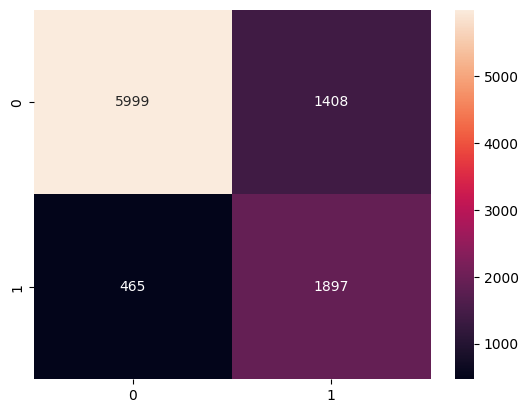

In [35]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

### 16. Generate Classification Report

In [36]:
print(f'classification report: \n{classification_report(y_test, y_pred)}\n')

classification report: 
              precision    recall  f1-score   support

       <=50K       0.93      0.81      0.86      7407
        >50K       0.57      0.80      0.67      2362

    accuracy                           0.81      9769
   macro avg       0.75      0.81      0.77      9769
weighted avg       0.84      0.81      0.82      9769




### 17. Evaluate Classification accuracy
### 18. Evaluate Classification error

In [37]:
print(f'classification accuracy: {accuracy_score(y_test, y_pred)}')
print(f'classification error: {1-accuracy_score(y_test, y_pred)}')

classification accuracy: 0.8082710615211383
classification error: 0.19172893847886174


### 19. Calculate class probabilities and store the probabilities in data frame with appropriate heading

In [38]:
y_pred_prob = gnb.predict_proba(X_test)[0:10]
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob <=50K', 'Prob >50K'])
y_pred_prob_df

,Prob <=50K,Prob >50K
0,9.999994e-01,5.741524e-07
1,9.996879e-01,3.120935e-04
2,1.544056e-01,8.455944e-01
3,1.736243e-04,9.998264e-01
4,8.201210e-09,1.000000e+00
5,8.768446e-01,1.231554e-01
6,9.999999e-01,7.328767e-08
7,9.999935e-01,6.539988e-06
8,9.877381e-01,1.226186e-02
9,1.000000e+00,4.018863e-09


### 20. Plot histogram of predicted probabilities

Text(0.5, 1.0, 'histogram of predicted probabilities')

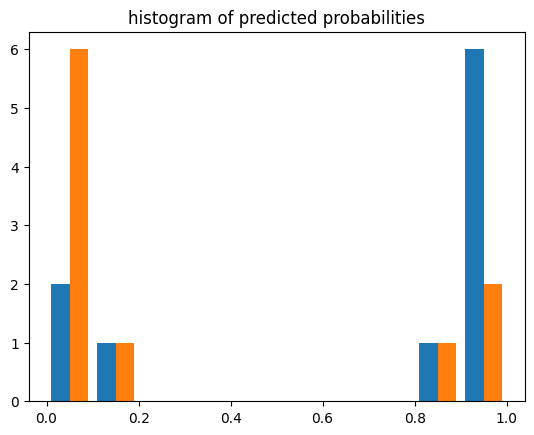

In [39]:
plt.hist(y_pred_prob_df)
plt.title('histogram of predicted probabilities')

### 21. Plot ROC Curve

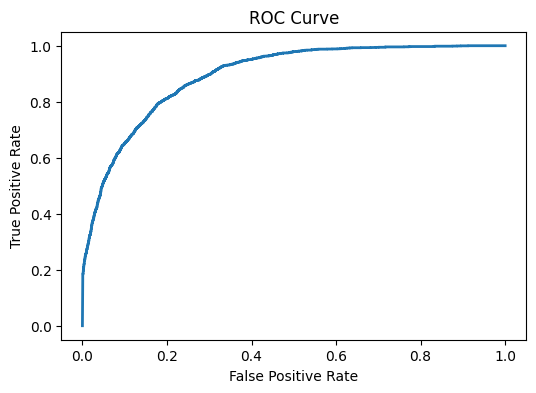

In [40]:
y_pred1 = gnb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = '>50K')
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


### 22. Compute ROC AUC

In [41]:
ROC_AUC = roc_auc_score(y_test, y_pred1)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8941


### 23. Calculate cross-validated ROC AUC

In [42]:
from sklearn.model_selection import cross_val_score
Cross_validated_ROC_AUC = cross_val_score(gnb, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8938


### 24. Applying 10-Fold Cross Validation

In [43]:
scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')
scores

array([0.81359649, 0.80438596, 0.81175954, 0.8056165 , 0.79596314,
       0.79684072, 0.81044318, 0.81175954, 0.80210619, 0.81044318])

### 25. Compute the Average cross-validation score

In [44]:
print(f'average cross-validation score:{scores.mean()}')

average cross-validation score:0.8062914443854259
